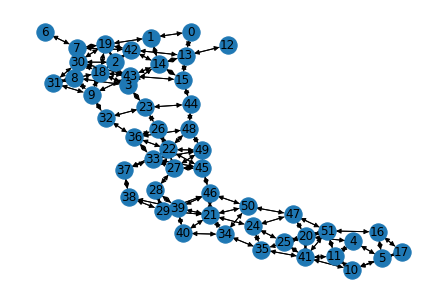

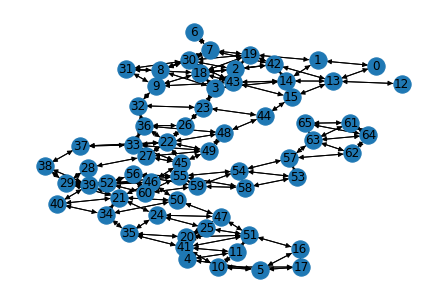

In [24]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
dataset = TUDataset(root='../data/', name='ENZYMES',use_node_attr=True)
dataset = dataset.shuffle()
len(dataset)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

train_dataset = dataset[:540]
test_dataset = dataset[540:]

from torch_geometric.utils import convert
import networkx as nx

plt.figure()
dataG = convert.to_networkx(dataset[0])
nx.draw_kamada_kawai(dataG,with_labels=True)

from torch_geometric.data import Batch 
b = Batch.from_data_list([dataset[0],dataset[1]])
plt.figure()
dataG = convert.to_networkx(b)
nx.draw_kamada_kawai(dataG,with_labels=True)

# 快速开始
以 Cora 引文数据集为例。

In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='../data', name='Cora')

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print('Accuracy: %f' % (acc))


Accuracy: 0.791000


# 绘制 Cora 数据集

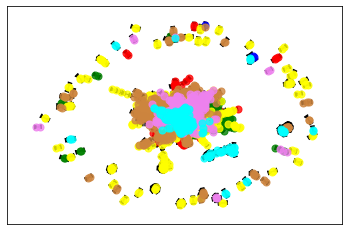

In [10]:
from torch_geometric.utils import convert
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

cora = to_networkx(dataset.data)
pos = nx.layout.spring_layout(cora)


node_color = ["red","blue","green","yellow","peru","violet","cyan"] 
node_label = np.array(list(cora.nodes)) 
node_classes = dataset.data.y.data.numpy()
for i in np.arange(len(np.unique(node_classes))):
    node_list = node_label[node_classes == i]
    nx.draw_networkx_nodes(cora, pos, nodelist=list(node_list),
                           node_size=50,  
                           node_color=node_color[i], 
                           alpha=0.8)
nx.draw_networkx_edges(cora, pos,width=1,edge_color="black")
plt.show()